In [1]:
import pandas as pd
from operator import itemgetter
import ast

import matplotlib.pyplot as plt

import networkx as nx

In [2]:
df = pd.read_csv("mixed.csv", index_col = [0])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9928 entries, 0 to 9927
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   author_id            9928 non-null   int64  
 1   created_at           9928 non-null   object 
 2   entities             8907 non-null   object 
 3   id                   9928 non-null   int64  
 4   in_reply_to_user_id  2657 non-null   float64
 5   text                 9928 non-null   object 
 6   name                 9928 non-null   object 
 7   username             9928 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 698.1+ KB


In [4]:
in_reply_to_user_df = df[df['in_reply_to_user_id'].notna()]

In [5]:
in_reply_to_user_df = in_reply_to_user_df.merge(df, left_on='in_reply_to_user_id', right_on='author_id')
in_reply_to_user_df = in_reply_to_user_df.rename(columns={"username_x": "target","username_y": "source"})
in_reply_to_user_df = in_reply_to_user_df[["source", "target"]]
in_reply_to_user_df = in_reply_to_user_df.drop_duplicates(keep= 'first', ignore_index=True)

In [6]:
in_reply_to_user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669 entries, 0 to 668
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   source  669 non-null    object
 1   target  669 non-null    object
dtypes: object(2)
memory usage: 10.6+ KB


In [123]:
mentions = []
for i in range(len(df)):
  if isinstance((df["entities"][i]), str):
    if "mentions" in ast.literal_eval(df["entities"][i]).keys():
      mention = {
          "id": df["id"][i],
          "mention_username": ast.literal_eval(df["entities"][i]).get("mentions")[0].get("username")
        }
      mentions.append(mention)

mentions_df = pd.DataFrame(mentions)
mentions_df.head()

,id,mention_username
0,1531407533864529921,GairahUmmi
1,1531407520899923968,GairahUmmi
2,1531407506949681153,GairahUmmi
3,1531407515161743360,barang2gemas
4,1531407478147076096,dinaaghnias


In [8]:
tweets_mention_df = mentions_df.merge(df, left_on='id', right_on='id')
tweets_mention_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6730 entries, 0 to 6729
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   6730 non-null   int64  
 1   mention_username     6730 non-null   object 
 2   author_id            6730 non-null   int64  
 3   created_at           6730 non-null   object 
 4   entities             6730 non-null   object 
 5   in_reply_to_user_id  2409 non-null   float64
 6   text                 6730 non-null   object 
 7   name                 6730 non-null   object 
 8   username             6730 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 525.8+ KB


In [9]:
user_mentions_df = tweets_mention_df.rename(columns={"username": "source", "mention_username": "target"})
user_mentions_df = user_mentions_df[["source", "target"]]
user_mentions_df = user_mentions_df.drop_duplicates(keep= 'first', ignore_index=True)
user_mentions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6330 entries, 0 to 6329
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   source  6330 non-null   object
 1   target  6330 non-null   object
dtypes: object(2)
memory usage: 99.0+ KB


In [10]:
final_df = pd.concat([in_reply_to_user_df, user_mentions_df], ignore_index=True)
# final_df = final_df.drop_duplicates(keep= 'first', ignore_index=True)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   source  6999 non-null   object
 1   target  6999 non-null   object
dtypes: object(2)
memory usage: 109.5+ KB


## Proses Segmentasi

In [11]:
G = nx.Graph()

In [12]:
G = nx.from_pandas_edgelist(final_df, 'source', 'target')

In [13]:
pos = nx.kamada_kawai_layout(G)

In [14]:
# plt.figure(figsize=(10,10))
# nx.draw(G, with_labels=False,
#         node_color='skyblue',
#         node_size=500,
#         arrowsize=20,
#         alpha=0.6,)

# Network Centrality

In [15]:
list(nx.closeness_centrality(G, wf_improved=False).items())[-1]

('mooniejimin_', 0.22249819725983494)

In [16]:
# Urutan dari Nilai Tertinggi
sorted(nx.closeness_centrality(G, wf_improved=False).items(), key=lambda x:x[1], reverse=True)[0:10]

[('iamfaen', 1.0),
 ('tzuxxwi', 1.0),
 ('sayangdiawih', 1.0),
 ('2022akukayaraya', 1.0),
 ('1010100ecce', 1.0),
 ('MissNshi', 1.0),
 ('KenyaHealthFed', 1.0),
 ('IndonesiaGaruda', 1.0),
 ('AngryyMeow', 1.0),
 ('sbmptnfess', 1.0)]

### Mengukur Topologi Jejaring Sosial Secara Keseluruhan

In [17]:
# Menampilkan Jumlah Nodes
print('Jumlah nodes', nx.number_of_nodes(G))

# Menampilkan Jumlah Edges
print('Jumlah edges', nx.number_of_edges(G))

# Menampilkan Diameter Jaringan
# print('Diameter Jaringan', nx.diameter(G))

# Menampilkan Average Shortest Path
# print('Average Shortest Path', nx.average_shortest_path_length(G))

# Menampilkan Density
print('Density', nx.density(G))

# Menapilkan Jumlah Connected Component
print('Jumlah connected component', nx.number_connected_components(G))

Jumlah nodes 7155
Jumlah edges 6351
Density 0.00024814957429512683
Jumlah connected component 1367


In [18]:
# Impor Modul
import networkx.algorithms.community as nx_comm

# Deteksi komunitas menggunakan modularity
communities = sorted(nx_comm.louvain_communities(G), key=len, reverse=True)
nx_comm.modularity(G, communities)

0.9446544967012197

In [19]:
closeness_dict = nx.closeness_centrality(G, wf_improved=False) # Run eigenvector centrality

In [20]:
nx.set_node_attributes(G, closeness_dict, 'closseness')

In [21]:
modularity_dict = {} # Create a blank dictionary
for i,c in enumerate(communities): # Loop through the list of communities, keeping track of the number for the community
    for name in c: # Loop through each person in a community
        modularity_dict[name] = i # Create an entry in the dictionary for the person, where the value is which group they belong to.

# Now you can add modularity information like we did the other metrics
nx.set_node_attributes(G, modularity_dict, 'modularity')

In [22]:
modularity_dict

{'florbyal': 0,
 'Deaafbry': 0,
 'libraulz': 0,
 'Panggilantik': 0,
 'itswipee': 0,
 'stiffjin': 0,
 'putrimjihan': 0,
 'pngnytwit': 0,
 'sambatt4lyfe': 0,
 'gasukarasataro': 0,
 'mlgrzkyy': 0,
 'Citrarobita': 0,
 'gotagameonline': 0,
 'maaphaluuu': 0,
 'stuviee1': 0,
 'Amawan19': 0,
 'MayaKindi': 0,
 'endearedme': 0,
 'vvv_liyue_': 0,
 'withadamopolii_': 0,
 'capaaaw': 0,
 'zeehidayah': 0,
 'ericjunseok': 0,
 'Dhillast2': 0,
 'nafiratp': 0,
 '_alapyu': 0,
 'Anggrainyselv': 0,
 'xxpirman': 0,
 'vwx_zoommynine': 0,
 'wahyuindah_123': 0,
 'brikitiww': 0,
 'Nimatuz20': 0,
 'NapituRichard': 0,
 'Hc6689': 0,
 'ilhamsatriya7': 0,
 'Alifah64881254': 0,
 'monolidqueen': 0,
 'HashimThaci1': 0,
 'queenlaaaaaa': 0,
 'jenniferlandauu': 0,
 'kikymanikasari': 0,
 'Reanvini': 0,
 'clickmorev': 0,
 'sillyerinn': 0,
 'hiddengemsfru': 0,
 'geelatooo': 0,
 'NadiyahAlifani': 0,
 'Nisabil11': 0,
 'almostayu': 0,
 'wacandaaa_': 0,
 'Ndorobaobei': 0,
 'Bmine_Byours': 0,
 'Ballonsnavy': 0,
 'imgroot_y': 0,
 '

In [23]:
import numpy as np
unique_coms = np.unique(list(modularity_dict.values()))

In [24]:
dicts = {}
keys = unique_coms
values = []
for i in range(len(unique_coms)):
  values.append(len({key: value for key, value in modularity_dict.items() if value == i}))

for i in keys:
        dicts[i] = values[i]
{k: v for k, v in sorted(dicts.items(), key=lambda item: item[1], reverse=True)}

{0: 894,
 1: 516,
 2: 337,
 3: 298,
 4: 137,
 5: 135,
 6: 118,
 7: 111,
 8: 107,
 9: 107,
 10: 106,
 11: 103,
 12: 97,
 13: 93,
 14: 89,
 15: 84,
 16: 58,
 17: 53,
 18: 49,
 19: 48,
 20: 41,
 21: 39,
 22: 38,
 23: 38,
 24: 34,
 25: 30,
 26: 29,
 27: 27,
 28: 25,
 29: 24,
 30: 21,
 31: 18,
 32: 18,
 33: 18,
 34: 17,
 35: 17,
 36: 15,
 37: 14,
 38: 14,
 39: 14,
 40: 14,
 41: 13,
 42: 13,
 43: 13,
 44: 13,
 45: 12,
 46: 12,
 47: 12,
 48: 11,
 49: 11,
 50: 11,
 51: 11,
 52: 11,
 53: 10,
 54: 10,
 55: 9,
 56: 9,
 57: 8,
 58: 8,
 59: 8,
 60: 8,
 61: 8,
 62: 8,
 63: 8,
 64: 8,
 65: 7,
 66: 7,
 67: 7,
 68: 7,
 69: 7,
 70: 7,
 71: 7,
 72: 7,
 73: 6,
 74: 6,
 75: 6,
 76: 6,
 77: 6,
 78: 6,
 79: 6,
 80: 6,
 81: 6,
 82: 6,
 83: 6,
 84: 6,
 85: 6,
 86: 6,
 87: 6,
 88: 6,
 89: 5,
 90: 5,
 91: 5,
 92: 5,
 93: 5,
 94: 5,
 95: 5,
 96: 5,
 97: 5,
 98: 5,
 99: 5,
 100: 5,
 101: 5,
 102: 5,
 103: 5,
 104: 5,
 105: 5,
 106: 5,
 107: 5,
 108: 5,
 109: 5,
 110: 5,
 111: 4,
 112: 4,
 113: 4,
 114: 4,
 115: 4,

In [25]:
filtered_dict = {k:v for (k,v) in modularity_dict.items() if k == "mooniejimin_"}
filtered_dict

{'mooniejimin_': 3}

In [88]:
degree_dict = nx.degree_centrality(G) # Run betweenness centrality
nx.set_node_attributes(G, degree_dict, 'degree')

In [92]:
# First get a list of just the nodes in that class
class0 = [n for n in G.nodes() if G.nodes[n]['modularity'] == 0]

# Then create a dictionary of the eigenvector centralities of those nodes
class0_closeness = {n:G.nodes[n]['degree'] for n in class0}

# Then sort that dictionary and print the first 5 results
class0_sorted_by_closeness = sorted(class0_closeness.items(), key=itemgetter(1), reverse=True)

print("Modularity Class 0 Sorted by closeness Centrality:")
for node in class0_sorted_by_closeness[:10]:
    print("Name:", node[0], "| degree Centrality:", node[1])

Modularity Class 0 Sorted by closeness Centrality:
Name: dinaaghnias | degree Centrality: 0.12720156555772993
Name: pejuangmawar | degree Centrality: 0.0005591277606933184
Name: ItsFreyaay | degree Centrality: 0.0002795638803466592
Name: HerdianaFirman7 | degree Centrality: 0.0002795638803466592
Name: strngrrrrhourly | degree Centrality: 0.0002795638803466592
Name: maxii_little | degree Centrality: 0.0002795638803466592
Name: DioDewananda | degree Centrality: 0.0001397819401733296
Name: bloomyluvv_tm | degree Centrality: 0.0001397819401733296
Name: hepirays | degree Centrality: 0.0001397819401733296
Name: Citrarobita | degree Centrality: 0.0001397819401733296


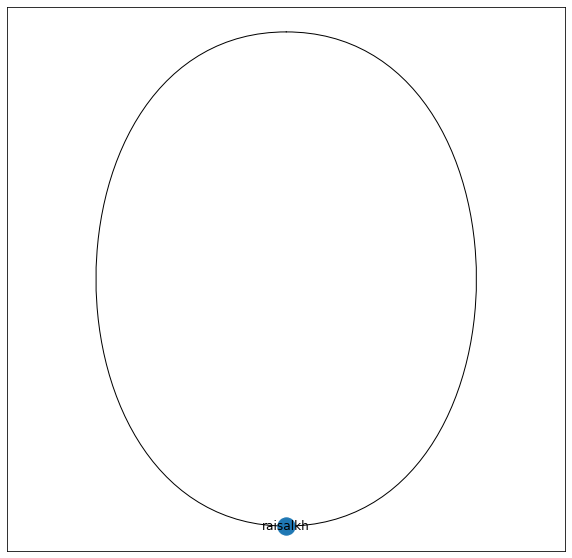

In [27]:
subgraph = G.subgraph(communities[1280])
plt.figure(figsize=(10,10))
nx.draw_networkx(subgraph)

# Visualisasi

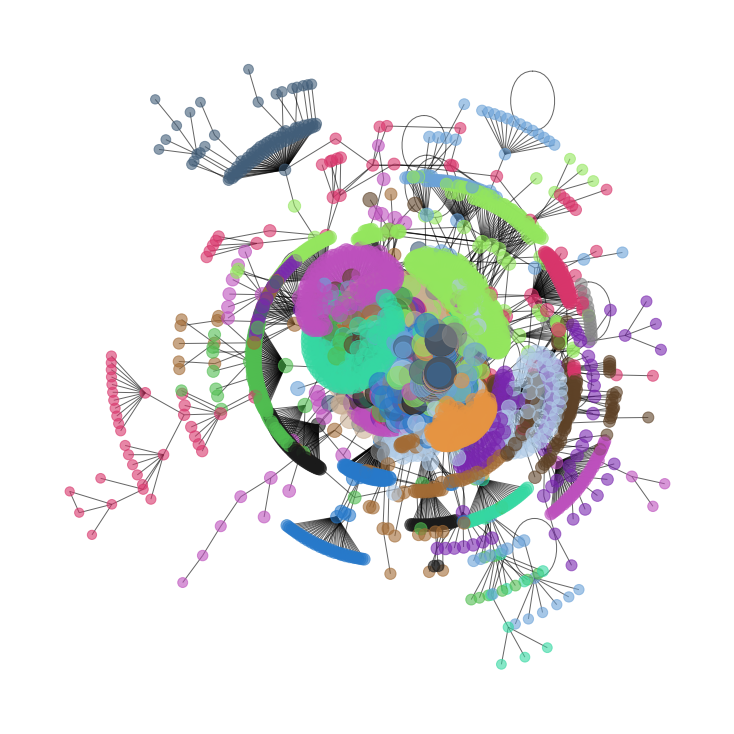

In [28]:
# Membuat fungsi komunitas
def set_node_community(G, communities):
    "'Add community to node attributes'"
    for c, v_c in enumerate(communities):
        for v in v_c:
            # Add 1 to save 0 for external edges
            G.nodes[v]['community'] = c + 1

# Membuat fungsi warna
def get_color(i, r_off=1, g_off=1, b_off=1):
    "'Assign a color to an edge'"
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i+r_off)*3) % n)/(n-1)
    g=low+span*(((i+g_off)*5)%n)/(n-1)
    b=low+span*(((i+b_off)*7)%n)/(n-1)
    return(r,g,b)

# Menetapkan komunitas untuk setiap node
community = set_node_community(G, communities)

# Menetapkan warna node
node_color = [get_color(G.nodes[v]['community']) for v in G.nodes]
# Menetapkan dictionary nilai degree
d=closeness_dict

# Memvisualisasikan jaringan
plt.figure(figsize=(10,10))
nx.draw(G, with_labels=False,
        node_color=node_color,
        alpha=0.6,
        node_size=[v*1000 for v in d.values()],
        # arrowstyle='->', arrowsize=20, 
        # font_size=9,
        cmap=plt.get_cmap('jet'),
        pos=pos)

# for node, (x, y) in pos.items():
#     plt.text(x, y, node, fontsize=d[node]*70, ha='center', va='center', color="black")

# Edge Betweenness

In [55]:
# Sebelum di sort
edge_betweenness = nx.edge_betweenness_centrality(G).items()
dict(edge_betweenness)

{('412code', '412code'): 0.0,
 ('412code', 'weareoneEXO'): 7.814503992918496e-08,
 ('iamfaen', 'iamfaen'): 0.0,
 ('iamfaen', 'WlRANGGA'): 3.907251996459248e-08,
 ('tanyakanrl', 'sofunkahbegitu'): 0.00010850438794167332,
 ('tanyakanrl', 'yepojii'): 0.00010850438794167332,
 ('tanyakanrl', 'ChrsBang03'): 0.00010850438794167332,
 ('tanyakanrl', 'ungaada'): 0.00010850438794167332,
 ('tanyakanrl', 'OuiOoouuuiii'): 0.008246597857259307,
 ('tanyakanrl', 'elementalpain'): 0.00010850438794167332,
 ('tanyakanrl', 'boo_boeu'): 0.00010850438794167332,
 ('tanyakanrl', 'halunna_'): 0.00010850438794167332,
 ('tanyakanrl', 'g0ldenbabyyy'): 0.00010850438794167332,
 ('tanyakanrl', 'ssaaboo'): 0.00010850438794167332,
 ('tanyakanrl', 'seblakenakk23'): 0.00010850438794167332,
 ('tanyakanrl', 'silverqueen165'): 0.015057712941978078,
 ('tanyakanrl', 'hazel_hzy'): 0.00010850438794167332,
 ('tanyakanrl', 'Navyllia'): 0.00010850438794167332,
 ('tanyakanrl', 'athealeyl'): 0.0019632284517373875,
 ('tanyakanrl', 'w

In [58]:
list(edge_betweenness)[1][1]

7.814503992918496e-08

In [59]:
sorted(edge_betweenness, key=lambda pair: -pair[1])

[(('dinaaghnias', 'beybyoun'), 0.016501748167155023),
 (('silverqueen165', 'dinaaghnias'), 0.015153167108251576),
 (('tanyakanrl', 'silverqueen165'), 0.015057712941978078),
 (('dinaaghnias', 'animekaks'), 0.014137665055231499),
 (('dinaaghnias', 'biscofz'), 0.01283036276353359),
 (('convomf', 'animekaks'), 0.01216472114821633),
 (('ohmybeautybank', 'beybyoun'), 0.011377104808125447),
 (('ohmybeautybank', 'sideofly_vv'), 0.011051901584477239),
 (('dinaaghnias', 'nwzhr'), 0.010023508219362398),
 (('dinaaghnias', 'anyzwlyr'), 0.010023508219362393),
 (('ohmybeautybank', 'nwzhr'), 0.009991894539560354),
 (('ohmybeautybank', 'anyzwlyr'), 0.009991894539560352),
 (('tanyakanrl', 'OuiOoouuuiii'), 0.008246597857259307),
 (('OuiOoouuuiii', 'andihiyat'), 0.008145148850065554),
 (('pren_art', 'andihiyat'), 0.008050548361823234),
 (('barang2gemas', 'biscofz'), 0.007753223083171298),
 (('kecandushopping', 'sideofly_vv'), 0.007452964550103557),
 (('beybyoun', 'beauthingy'), 0.0066315201828480745),
 ((

In [36]:
NUM_OF_ITERATIONS = 75
comps = G.copy()
for i in range(NUM_OF_ITERATIONS):
  edge_betweenness = nx.edge_betweenness_centrality(comps).items()
  edge_to_delete = sorted(edge_betweenness, key=lambda pair: -pair[1])[0][0]
  degree = sorted(edge_betweenness, key=lambda pair: -pair[1])[0][1]
  comps.remove_edge(*edge_to_delete)

  # nx.draw(comps, with_labels=True, node_color='r')
  print(sorted(edge_betweenness, key=lambda pair: -pair[1])[:5])
  print('Step %s, %s\nEdge %s deleted'%(i,degree, edge_to_delete))
  coms = []
  for component in nx.connected_components(comps):
      coms.append(component)
  print('Modularity', nx_comm.modularity(G, coms))
  print("--------------------------------")

  # plt.show()

[(('dinaaghnias', 'beybyoun'), 0.016501748167155023), (('silverqueen165', 'dinaaghnias'), 0.015153167108251578), (('tanyakanrl', 'silverqueen165'), 0.015057712941978078), (('dinaaghnias', 'animekaks'), 0.014137665055231499), (('dinaaghnias', 'biscofz'), 0.01283036276353359)]
Step 0, 0.016501748167155023
Edge ('dinaaghnias', 'beybyoun') deleted
Modularity 0.7435745764598554
--------------------------------
[(('dinaaghnias', 'anyzwlyr'), 0.017444687116275007), (('dinaaghnias', 'nwzhr'), 0.017444687116275), (('ohmybeautybank', 'anyzwlyr'), 0.017415085671250843), (('ohmybeautybank', 'nwzhr'), 0.01741508567125084), (('silverqueen165', 'dinaaghnias'), 0.015107420551740441)]
Step 1, 0.017444687116275007
Edge ('dinaaghnias', 'anyzwlyr') deleted
Modularity 0.7435745764598554
--------------------------------
[(('dinaaghnias', 'nwzhr'), 0.03408926604510417), (('ohmybeautybank', 'nwzhr'), 0.03405970367259964), (('silverqueen165', 'dinaaghnias'), 0.015070205614563343), (('tanyakanrl', 'silverqueen1

# Girvan–Newman algorithm

In [32]:
# import itertools
# k = 21
# comp = nx_comm.girvan_newman(G)
# # for communities in itertools.islice(comp, k):
#   # print(nx_comm.modularity(G, communities))
#     # print(list(sorted(c) for c in communities))
# *_, last = itertools.islice(comp, k)
# list_last = list(last)
# nx_comm.modularity(G, list_last)

In [37]:
G.number_of_edges()

6351

In [78]:
coms = []
for component in nx.connected_components(comps):
    coms.append(component)
nx_comm.modularity(G, coms)
sorted_comps = sorted(coms, key=len, reverse=True)

modularity_dict = {}
parts = nx.connected_components(comps)
for i, c in enumerate(sorted_comps):
    if len(c) > 1:
        for name in c: # Loop through each person in a community
            modularity_dict[name] = i

nx.set_node_attributes(G, modularity_dict, 'modularity')

('ImanAbdulRahim', 1275)

In [86]:
filtered_dict1 = {k:v for (k,v) in modularity_dict.items() if v == 1}
filtered_dict1

{'franscisss': 1,
 'menyasarrr': 1,
 '6_aphrodite': 1,
 'TentaHp': 1,
 'biput8': 1,
 'aevantlyn': 1,
 'MOTIVASI7622': 1,
 'KhounuriahIsni2': 1,
 'Vixzyh435': 1,
 'anaksiapaya_': 1,
 'OnXblo': 1,
 'AnnisaNurullit3': 1,
 'Randika84607657': 1,
 'Pawpaww33': 1,
 'babytangerine13': 1,
 'araachel82': 1,
 'kennethanie': 1,
 'wlntwer': 1,
 'minggombabe': 1,
 'daraajg': 1,
 'akunnrrandom': 1,
 'segaismycat': 1,
 '1975cassettee': 1,
 'humairaakilla': 1,
 'beibikuu': 1,
 'abcsdjndknjsnjs': 1,
 'greychicklit': 1,
 'morklipop': 1,
 'TamaPratamaa07': 1,
 'Lsy543': 1,
 'ForRecomd': 1,
 'vandaa_gardenia': 1,
 'maghfirautamy_': 1,
 'redblackshirts': 1,
 'bukanorangyee': 1,
 'n_n25jk97': 1,
 'milllieeyy': 1,
 'gitalestarisit': 1,
 'ilymysunoo': 1,
 'ShopeeCuties': 1,
 'kimvantaae': 1,
 'Damauludin': 1,
 'mbanonimx': 1,
 'mejikuhibinuww': 1,
 'keluhankoe': 1,
 'raaewr': 1,
 'daisyyyyyyyyy9': 1,
 'micaorganica': 1,
 'vanillatedchoco': 1,
 'Keyaprllynti': 1,
 'fbnptr': 1,
 'Magdale10035323': 1,
 'hannafizl

In [112]:
unique_coms = np.unique(list(modularity_dict.values()))
dicts = {}
keys = unique_coms
values = []
for i in range(len(unique_coms)):
  values.append(len({key: value for key, value in modularity_dict.items() if value == i}))

for i in keys:
        dicts[i] = values[i]
list({k: v for k, v in sorted(dicts.items(), key=lambda item: item[1], reverse=True)}.items())[-1]

(1275, 2)

In [122]:
# First get a list of just the nodes in that class
class1 = [n for n in G.nodes() if G.nodes[n]['modularity'] == 2]

# Then create a dictionary of the eigenvector centralities of those nodes
class1_closeness = {n:G.nodes[n]['degree'] for n in class1}
print(len(list(class1_closeness)))
print((list(class1_closeness)))
# Then sort that dictionary and print the first 5 results
class1_sorted_by_closeness = sorted(class1_closeness.items(), key=itemgetter(1), reverse=True)

print("Modularity Class 0 Sorted by closeness Centrality:")
for node in class1_sorted_by_closeness[:10]:
    print("Name:", node[0], "| degree Centrality:", node[1])

447
['echachaa__', 'ohmybeautybank', 'bobaa56_', 'startalook', 'chawassleepy', 'anisafn_', 'shannownn', 'marimasku', 'gklaper', 'skincareaaan', 'aldachrsta', '_bodoah', 'sukanyabuah', 'maniskucayang', 'zameizamei', 'filleauxo', 'milkteaa____', 'harleymaqueen', 'ryeonseunggg', 'benerjugalo', 'usersikecil', 'strawberryheree', 'BB0NGSHIK', 'AKUPANIKBINGITZ', 'hourlyima', 'asdfghjkl97e', 'yyalarte', 'dprjsry', 'joyakult', 'jelianggur', 'flooooooowlsy', 'ufindanotherme', 'reinkarnaxi', 'burgercheeeese', 'nonadeaS', 'windianggs', 'winterjoyy', 'dwrl7', 'ayunov7788', 'nothingrara', 'nowraaawrrr', 'urser0tonin', 'orbitandgravity', 'olrigin', 'nicexttaa_', 'pyoplayground', 'risacantiqq', 'yrgjane', 'ichangcuttt', 'gidaryoso', 'nattvgn', 'beautales_', 'Nazel01', 'momontyy', 'FashionBabe157', 'melomtea', 'aslinyasicapek', 'paska19600', 'fsnflwr', 'kxssmark', 'perlaamutia', 'aulydheafadilla', 'paranoeis', 'yourkailey', 'kurakurakebalik', 'kozucookie', 'ItsMarch24th', '123kitajadian', 'stfuxzxx', '

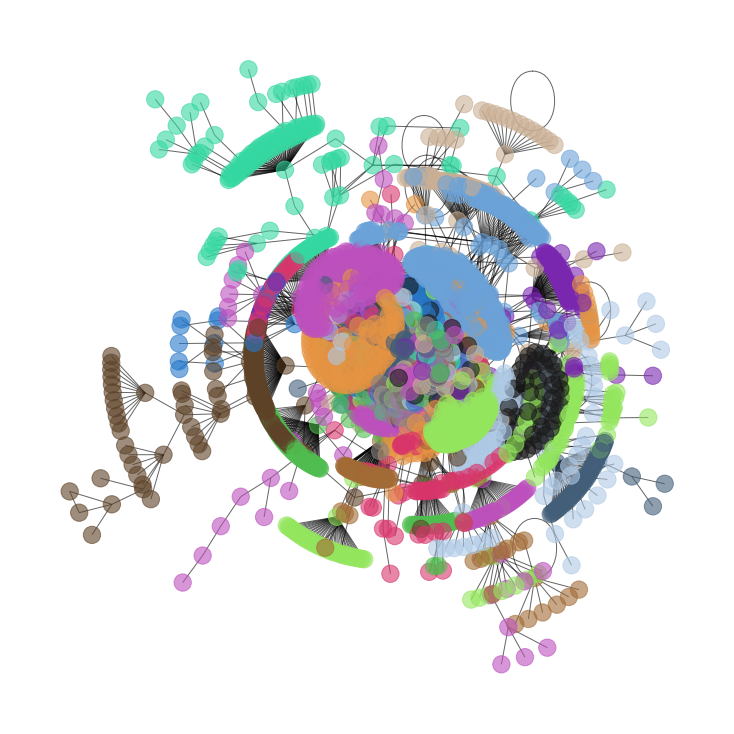

In [68]:
node_color = [get_color(G.nodes[v]['modularity']) for v in G.nodes]
plt.figure(figsize=(10,10))
nx.draw(G, with_labels=False,
        node_color=node_color,
        alpha=0.6,
        # node_size=[v*1000 for v in d.values()],
        # arrowstyle='->', arrowsize=20, 
        # font_size=9,
        cmap=plt.get_cmap('jet'),
        pos=pos)

# for node, (x, y) in pos.items():
#     plt.text(x, y, node, fontsize=20, ha='center', va='center', color="black")